<a href="https://colab.research.google.com/github/sushantnair/Decision_Tree_GINI_Index/blob/main/DecisionTree_GINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import networkx as nx
from itertools import combinations

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BuyCarNew.csv')

In [ ]:
data

,ID,Age,Income,Student,Credit_Rating,Buy_Car
0,1,Youth,High,No,Fair,N
1,2,Youth,High,No,Excellent,N
2,3,Middleage,High,No,Fair,Y
3,4,Senior,Mid,No,Fair,Y
4,5,Senior,Low,Yes,Fair,Y
5,6,Senior,Low,Yes,Excellent,N
6,7,Middleage,Low,Yes,Excellent,Y
7,8,Youth,Mid,No,Fair,N
8,9,Youth,Low,Yes,Fair,Y
9,10,Senior,Mid,Yes,Fair,Y


In [ ]:
continueflag = True
treedata = dict()
nor = data.shape[0]       # Number of records
target_var_values = dict()
target_var = input('Enter the Traget Variable of the Dataset: ')
for value in data[f'{target_var}']:
    target_var_values[value] = target_var_values.get(value, 0) + 1
print(f'Target Variable Values: {target_var_values}')
infoD = 0
for val, cnt in target_var_values.items():
    infoD += (cnt / nor) * math.log((cnt / nor), 2)
infoD = -infoD
print(f'Information Gain at Target Variable {target_var}: {infoD:.3f}')

Enter the Traget Variable of the Dataset: Buy_Car
Target Variable Values: {'N': 5, 'Y': 9}
Information Gain at Target Variable Buy_Car: 0.940


In [ ]:
def find_root_node(data):
    colvals = dict()
    nor = data.shape[0]       # Number of records



    columns = data.columns[(data.columns != 'ID') & (data.columns != 'Buy_Car')].tolist()
    print(f'Columns in the dataframe: {columns}')
    # colvals = dict()
    # OUTPUT: {'Age': {'Y': 5, 'M': 4, 'S': 5}, 'Income': {'H': 4, 'M': 6, 'L': 4}, 'Student': {'N': 7, 'Y': 7}, 'Credit_Rating': {'F': 8, 'E': 6}}
    # This dictionary's keys are the column names, and the values are dictionaries whose key is the unique value for each column
    # (like Y (youth), M (middleage), S (senior) are values for Age column) and value is the number of occurrences of that value in that column
    # e.g., youth occurs 5 times, middleage occurs 4 times and senior occurs 5 times in Age
    i = 0
    for column in columns:
        print(column)
        univals = dict()
        for value in data[column]:
            i += 1
            print(f'Column: {column}; Value Number: {i}; Value: {value}')
            if i % nor == 0:
                i = 0
            univals[value] = univals.get(value, 0) + 1
        print(f'{univals}')
        colvals[column] = univals
    print(f'COLUMNS AND THEIR VALUES: {colvals}')



    infoattrD = dict()
    exceptions = 0
    for column in columns:
        print(f'Consider {column} and Class Buy Car columns')
        print(f'Values of {column}: {colvals[column]}')
        calc_cum = 0
        for val, count in colvals[column].items():
            print(f'{val}, {count}')
            # val_indices = [i for i, x in enumerate(data[column]) if x == val]
            val_indices = [i for i, x in data[column].items() if x == val]
            if not val_indices:
                continue
            cbc_values = [data['Buy_Car'][idx] for idx in val_indices]
            print(f'Indices where {val} is found: {val_indices}')
            print(f'Corresponding value of Buy Car: {cbc_values}')
            # reset count values for each value
            count_y = 0
            count_n = 0
            calc = 0
            for cbc_value in cbc_values:
                if cbc_value == "Y":
                    count_y += 1
                else:
                    count_n += 1
            print(f'count: {count}; count_y: {count_y}; count_n: {count_n}')
            try:
                calc = (count / nor) * (-((count_y / count) * math.log((count_y / count), 2)) - ((count_n / count) * math.log((count_n / count), 2)))
            except:
                print(f'except {cbc_values}')
                # this happens when one of the counts is zero, so log zero error is handled and value of calc is zero.
                # leaf node if all branches except out
                calc = 0
            calc_cum += calc
        print(f'{calc_cum}')
        infoattrD[f'{column}'] = calc_cum
        print(f'Information from Attributes: {infoattrD}')



    # Now calculate Gain in Information and find the root node for the given dataset
    gain = dict()
    for infoattr, info in infoattrD.items():
        gainval = infoD - info
        gain[infoattr] = gainval
    print(f'Gain in Information for Each Attribute: {gain}')



    if len(set(gain.values())) == 1:
        print(f'For {data.iloc[0, 0]}, all values are same. Hence it is a Leaf Node.')
        continueflag = False
        rootnode = None
        treedata[data.iloc[0, 0]] = {'Y': ''}
    else:
        rootnode = max(gain, key=gain.get)
        if type(data.iloc[0, 0]) == str:
            print(f'Thus it can be concluded that for the dataset \n{data}\nwhich has been derived from {data.iloc[0, 0]} value,\nthe root node is: {rootnode}')
            treedata[data.iloc[0, 0]] = {rootnode: ''}
        else:
            print(f'Thus it can be concluded that for the dataset \n{data}\nthe root node is: {rootnode}')
        colattrbs = {key: '' for key, val in colvals[rootnode].items()}
        treedata[rootnode] = colattrbs
    print(treedata)
    return (rootnode, colvals, treedata)

In [ ]:
def find_derivative_dataframes(dataframe, node, colvals):
    # The goal is given a node, derive dataframes.
    # For example, the rootnode for the original dataframe "data" is Age.
    # Age has three values Youth Middleage and Senior
    # So, derive three dataframes.
    # First dataframe is based on Age Y, where the Age column is removed and the rows of data correspond to the rows in the original dataframe with Age Y
    # Second dataframe is based on Age M, where the Age column is removed and the rows of data correspond to the rows in the original dataframe with AgeM
    # Third dataframe is based on Age S, where the Age column is removed and the rows of data correspond to the rows in the original dataframe with Age S
    print(f'COLUMN VALUES: {colvals[node]}')
    # data frame list
    dfl = list()
    for key, val in colvals[node].items():
        new_data_frame = dataframe[dataframe[f'{node}'] == key].copy()
        new_data_frame.drop(columns=['ID'], inplace=True)
        dfl.append(new_data_frame)
    print(f'The List of Dataframes Obtained from Node {node}: ')
    for df in dfl:
        print(df)
    return dfl

In [ ]:
rootnode, colvals, treedata = find_root_node(data)
data_frame_dict1 = find_derivative_dataframes(data, rootnode, colvals)
print('Now, each dataframe derived from the root node will be processed to reveal branch nodes.')
for dataframe in data_frame_dict1:
    print(dataframe)
    try:
        branchnode = find_root_node(dataframe)
        print(branchnode)
    except:
        print()

Columns in the dataframe: ['Age', 'Income', 'Student', 'Credit_Rating']
Age
Column: Age; Value Number: 1; Value: Youth
Column: Age; Value Number: 2; Value: Youth
Column: Age; Value Number: 3; Value: Middleage
Column: Age; Value Number: 4; Value: Senior
Column: Age; Value Number: 5; Value: Senior
Column: Age; Value Number: 6; Value: Senior
Column: Age; Value Number: 7; Value: Middleage
Column: Age; Value Number: 8; Value: Youth
Column: Age; Value Number: 9; Value: Youth
Column: Age; Value Number: 10; Value: Senior
Column: Age; Value Number: 11; Value: Youth
Column: Age; Value Number: 12; Value: Middleage
Column: Age; Value Number: 13; Value: Middleage
Column: Age; Value Number: 14; Value: Senior
{'Youth': 5, 'Middleage': 4, 'Senior': 5}
Income
Column: Income; Value Number: 1; Value: High
Column: Income; Value Number: 2; Value: High
Column: Income; Value Number: 3; Value: High
Column: Income; Value Number: 4; Value: Mid
Column: Income; Value Number: 5; Value: Low
Column: Income; Value Nu

{'Age': {'Youth': '', 'Middleage': '', 'Senior': ''}, 'Youth': {'Student': ''}, 'Student': {'No': '', 'Yes': ''}, 'Middleage': {'Y': ''}, 'Senior': {'Credit_Rating': ''}, 'Credit_Rating': {'Fair': '', 'Excellent': ''}}


<ipython-input-8-23d0871c1c7f>:20: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')


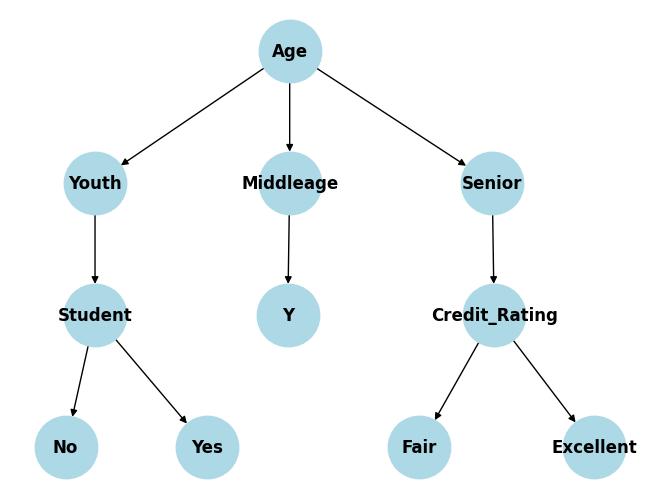

In [ ]:
# Plotting the Decision Tree

'''treedata = {
    "Age": {"Youth": '', "Middleage": '', "Senior": ''},
    "Youth": {"Student": ''},
    "Middleage": {"Y": ''},
    "Senior": {"Credit_Rating": ''},
    "Student": {"N": 'No', "Y": 'Yes'},
    "Credit_Rating": {"N": 'Excellent', "Y": 'Fair'}
}'''
print(treedata)

G = nx.DiGraph()

for node, children in treedata.items():
    for child, link_value in children.items():
        G.add_edge(node, child, weight=link_value)

# Use 'dot' layout
pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')

nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=2020)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


# GINI Index Calculation for Root Node of Original Dataframe

In [ ]:
def generate_combinations(node):
    values_of_node = [key for key, val in colvals[node].items()]
    #values_of_node = ['Baby', 'Youth', 'Middleage', 'Senior']
    print(values_of_node)

    # Generate all possible combinations of values of node
    all_combinations = []
    for r in range(1, len(values_of_node) + 1):
        all_combinations.extend(combinations(values_of_node, r))

    # Filter out incorrect combinations
    valid_combinations = [combo for combo in all_combinations if set(combo) == set(values_of_node)]

    # Restructure combinations to correct format
    final_combinations = []
    for combo in valid_combinations:
        internal_combinations = list(combinations(combo, len(combo) - 1))
        for internal_combo in internal_combinations:
            external_group = tuple(set(combo) - set(internal_combo))
            final_combinations.append((internal_combo, external_group))

    # Print generated combinations
    print(f'For the node {node} with values {values_of_node}, the generated combinations are as follows: ')
    for combo in final_combinations:
        print(combo)
    return final_combinations

In [ ]:
# GINI Index Part...
# We shall calculate GINI Index for the rootnode
def calc_gini_for_combos(rootnode):
    print(f'{target_var_values}')
    giniD = 1
    for val, cnt in target_var_values.items():
        prob = cnt / nor
        giniD -= math.pow(prob, 2)
    print(f'GINI Index on Training Data: {giniD}')
    print(f'GINI Index on Rootnode ({rootnode}) will be found...')
    print(f'Values of Rootnode ({rootnode}): {colvals[rootnode]}')
    combos = generate_combinations(rootnode)
    print(f'Generating GINI index for {rootnode} based on the combinations generated ...')
    target_var_val_lst = [key for key, val in target_var_values.items()]
    gini_combo = dict()
    for combo in combos:
        print(combo)
        gini = list()
        for items in combo:
            print(items)
            items_idcs_num = 0
            idcs_num = dict()
            val = 0
            for item in items:
                print(item)
                item_idcs = [i for i, x in data[f'{rootnode}'].items() if x == item]
                print(item_idcs)
                item_idcs_num = len(item_idcs)
                items_idcs_num += item_idcs_num
                for i in range(0, len(target_var_val_lst)):
                    print(target_var_val_lst[i])
                    idcs = [j for j, x in data[f'{target_var}'].items() if (x == target_var_val_lst[i] and (j in item_idcs))]
                    print(idcs)
                    value = target_var_val_lst[i]
                    idcs_num[value] = idcs_num.get(value, 0) + len(idcs)
            print(items_idcs_num) # 10
            print(target_var_values)
            print(idcs_num) # N 4 Y 6
            for idx, num in idcs_num.items():
                val += math.pow((num / items_idcs_num), 2)
            val = 1 - val
            gini.append(val)
            print(val)
            ginicombovalue = (items_idcs_num / nor) * val
            print(ginicombovalue)
            gini_combo[f'{combo}'] = gini_combo.get(f'{combo}', 0) + ginicombovalue
        print(f'GINI: {gini}')
    print(f'{gini_combo}')
    return gini_combo

In [ ]:
gini_combo = calc_gini_for_combos(rootnode = 'Income')
correct_combo = min(gini_combo, key=gini_combo.get)
print(f'The lowest index is selected as correct partition: {correct_combo} = {gini_combo[correct_combo]:.3f}')

{'N': 5, 'Y': 9}
GINI Index on Training Data: 0.4591836734693877
GINI Index on Rootnode (Income) will be found...
Values of Rootnode (Income): {'High': 4, 'Mid': 6, 'Low': 4}
['High', 'Mid', 'Low']
For the node Income with values ['High', 'Mid', 'Low'], the generated combinations are as follows: 
(('High', 'Mid'), ('Low',))
(('High', 'Low'), ('Mid',))
(('Mid', 'Low'), ('High',))
Generating GINI index for Income based on the combinations generated ...
(('High', 'Mid'), ('Low',))
('High', 'Mid')
High
[0, 1, 2, 12]
N
[0, 1]
Y
[2, 12]
Mid
[3, 7, 9, 10, 11, 13]
N
[7, 13]
Y
[3, 9, 10, 11]
10
{'N': 5, 'Y': 9}
{'N': 4, 'Y': 6}
0.48
0.34285714285714286
('Low',)
Low
[4, 5, 6, 8]
N
[5]
Y
[4, 6, 8]
4
{'N': 5, 'Y': 9}
{'N': 1, 'Y': 3}
0.375
0.10714285714285714
GINI: [0.48, 0.375]
(('High', 'Low'), ('Mid',))
('High', 'Low')
High
[0, 1, 2, 12]
N
[0, 1]
Y
[2, 12]
Low
[4, 5, 6, 8]
N
[5]
Y
[4, 6, 8]
8
{'N': 5, 'Y': 9}
{'N': 3, 'Y': 5}
0.46875
0.26785714285714285
('Mid',)
Mid
[3, 7, 9, 10, 11, 13]
N
[7, 